## Assignment 3 Answers

Ho = there is no decrease in time to detection
Ha = There is a decrease in time to detection

We work to reject the null hypothesis - to support the alternative, which is what we hope to see.

A one tail test will test if the means are greater or less than the mean of previous state.
A two tail test will only identify if there is statistical evidence to suppor they means are not equal.

In a one tail test, the area for a .05 alpha is on one of the tails. In a 2 tail test 2.5 is split between the upper and lower tails

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/ken.clements/code/SEAS8416/data/heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


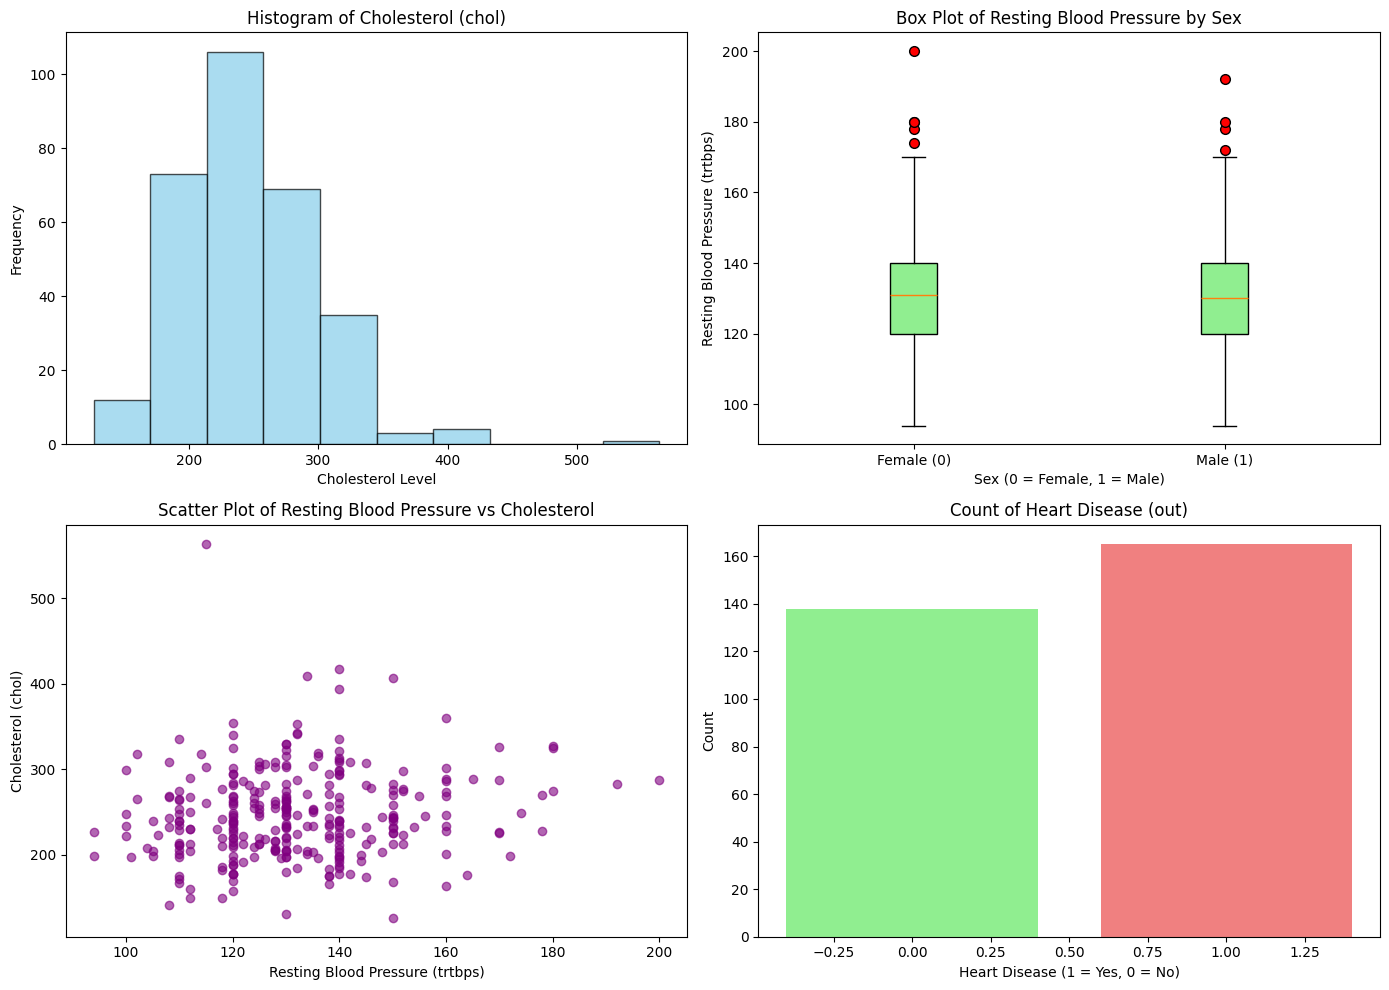

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].hist(df['chol'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
axes[0,0].set_title('Histogram of Cholesterol (chol)')
axes[0,0].set_xlabel('Cholesterol Level')
axes[0,0].set_ylabel('Frequency')

axes[0,1].boxplot([df[df['sex'] == 0]['trtbps'], df[df['sex'] == 1]['trtbps']], patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', color='black'), 
                flierprops=dict(markerfacecolor='red', marker='o', markersize=7, color='black'))
axes[0,1].set_title('Box Plot of Resting Blood Pressure by Sex')
axes[0,1].set_xticklabels(['Female (0)', 'Male (1)'])
axes[0,1].set_xlabel('Sex (0 = Female, 1 = Male)')
axes[0,1].set_ylabel('Resting Blood Pressure (trtbps)')

axes[1,0].scatter(df['trtbps'], df['chol'], color='purple', alpha=0.6)
axes[1,0].set_title('Scatter Plot of Resting Blood Pressure vs Cholesterol')
axes[1,0].set_xlabel('Resting Blood Pressure (trtbps)')
axes[1,0].set_ylabel('Cholesterol (chol)')

heart_counts = df['output'].value_counts()
axes[1,1].bar(heart_counts.index, heart_counts.values, color=['lightcoral', 'lightgreen'])
axes[1,1].set_title('Count of Heart Disease (out)')
axes[1,1].set_xlabel('Heart Disease (1 = Yes, 0 = No)')
axes[1,1].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_23053/2441326848.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc=0, frameon=True)


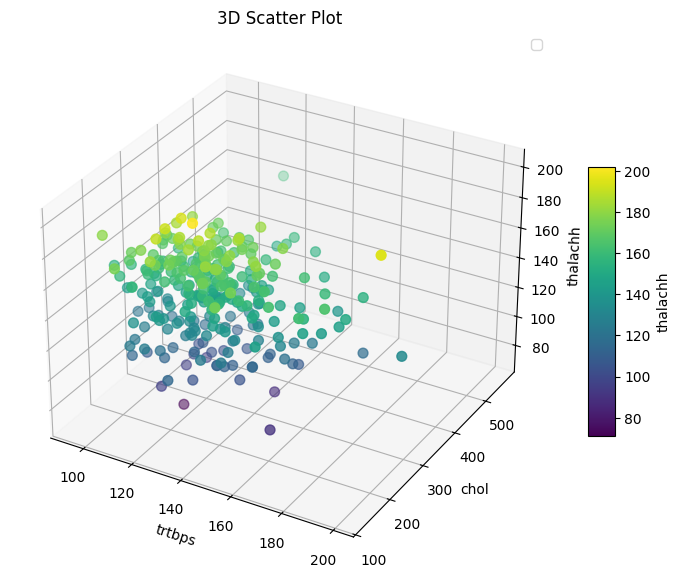

In [19]:
# Select the variables
x = df['trtbps']
y = df['chol']
z = df['thalachh']

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Set labels
ax.set_xlabel('trtbps')
ax.set_ylabel('chol')
ax.set_zlabel('thalachh')
ax.set_title('3D Scatter Plot')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('thalachh')

ax.legend(loc=0, frameon=True)

# Show the plot
plt.show()


In [ ]:
from scipy.stats import shapiro
results = shapiro(df['chol'])

In [ ]:
results[0] #this is the t stat

np.float64(0.9468815274790506)

In [23]:
results[1] # this is the pval

np.float64(5.364847008526224e-09)

This is a small number therefore we reject Ho that stated the data is normally distributed.
The alternative suggest this data is not normal.

In [26]:
import math

def standard_deviation(data):
    """
    Put some description of your function here
    """
    try:
        # Compute mean
        mean = data.mean()
        
        # Compute variance (average of squared deviations)
        variance = ((data - mean) ** 2).sum() / (len(data) - 1)
        
        # Standard deviation is the square root of the variance
        std_dev = math.sqrt(variance)
        
        return std_dev
    
    except TypeError:
        print("Error: You entered something other than a list, array or Series")
        return None



# Calculate the standard deviation using the custom function
std_dev = standard_deviation(df['chol'])
print(f"Standard Deviation of Cholesterol: {std_dev}")



Standard Deviation of Cholesterol: 51.83075098793003


In [27]:
df['chol'].std()

np.float64(51.83075098793003)

In [28]:
import random
random_setA = {random.randint(1, 100) for _ in range(25)}
random_setB = {random.randint(1, 100) for _ in range(25)}

In [31]:
union = random_setA.union(random_setB)
intersect = random_setA.intersection(random_setB)
sym_diff = random_setA ^ random_setB

In [32]:
print(f"Union is {union}")
print(f"Intersection is is {intersect}")
print(f"Sym Difference is {sym_diff}")

Union is {1, 2, 4, 6, 8, 9, 11, 12, 14, 17, 20, 21, 22, 25, 27, 28, 30, 34, 35, 37, 39, 40, 41, 46, 51, 53, 54, 58, 59, 60, 62, 64, 65, 66, 69, 70, 72, 75, 77, 83, 90, 91, 98}
Intersection is is {8, 1, 28}
Sym Difference is {2, 4, 6, 9, 11, 12, 14, 17, 20, 21, 22, 25, 27, 30, 34, 35, 37, 39, 40, 41, 46, 51, 53, 54, 58, 59, 60, 62, 64, 65, 66, 69, 70, 72, 75, 77, 83, 90, 91, 98}


In [33]:
val = int(72)
val in random_setA

True

In [34]:
set1 = {"apple", "banana", "cherry", "date", "fig"}
set2 = {"banana", "cherry", "grape", "kiwi", "melon"}

In [35]:
from scipy.spatial.distance import jaccard

list1 = list(set1)
list2 = list(set2)

distance = jaccard(list1, list2)
print(f"Jaccard Distance: {distance}")

Jaccard Distance: 0.8


((A * B) U C)^c  ->  (A * B)*c * C^c  ->  (A^c * C^c) U (B^c * C^c)